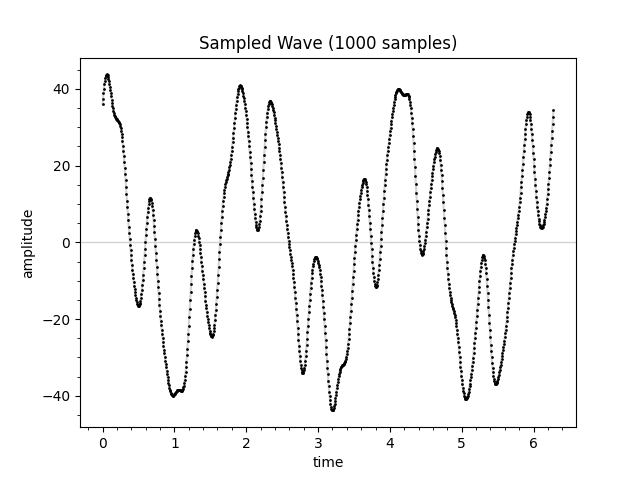

In [1]:
"""make_samples.ipynb"""
# Cell 1

from __future__ import annotations

import typing

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator

if typing.TYPE_CHECKING:
    from matplotlib.axes import Axes
    from numpy.typing import NDArray


%matplotlib widget

# fmt: off
def f(x: NDArray[np.float_]) -> NDArray[np.float_]:
    return np.array(29 * np.cos(3 * x) + 7 * np.cos(19 * x)
                    + 17 * np.sin(11 * x) + 2 * np.sin(31 * x))
# fmt: on


def plot(ax: Axes) -> None:
    sample_duration: float = 2 * np.pi
    num_samples: int = 1000

    ts: NDArray[np.float_] = np.linspace(
        0, sample_duration, num_samples, endpoint=False
    )
    ys: NDArray[np.float_] = f(ts)

    np.savetxt("samples.csv", np.vstack((ts, ys)).T, fmt="%1.13f", delimiter=", ")

    ax.set_title(f"Sampled Wave ({num_samples} samples)")
    ax.set_xlabel("time")
    ax.set_ylabel("amplitude")

    ax.axhline(y=0.0, color="lightgray", linewidth=1)

    # fmt: off
    ax.plot(ts, ys, color="lightgray",
        marker="o", markerfacecolor="none",
        markersize=1, markeredgecolor="black")
    # fmt: on

    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())


def main() -> None:
    plt.close("all")
    plt.figure(" ")
    plot(plt.axes())
    plt.show()


main()